95it [00:00, 94938.98it/s]
100%|██████████| 95/95 [00:01<00:00, 59.54it/s] 


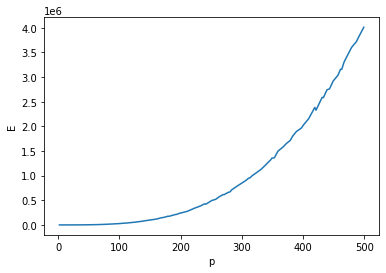

In [2]:
import numpy as np
from tqdm import tqdm
import sympy as sp
import matplotlib.pyplot as plt

def calc_expectation(p):
    z_p = range(1, p)
    outer = 0
    for k in z_p:
        inner = 0
        for x in z_p:
            inner += (x - p/2) * ((x * k) % p - p/2)
        inner /= p - 1
        outer += inner**2
    outer /= p - 1
    return outer

p_range = [p for p in tqdm(sp.primerange(2, 503))]
expectations = [calc_expectation(p) for p in tqdm(p_range)]
plt.plot(p_range, expectations)
plt.xlabel('p')
plt.ylabel('E')
plt.show()

Best-fit parameters: a = 0.014979152761757458, k = 0.4214915848525999


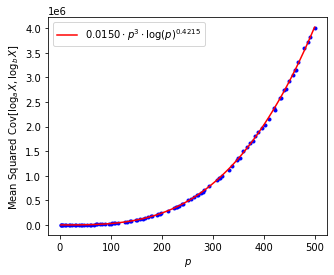

In [3]:
from scipy.optimize import curve_fit

def pxn_function(p, a, k):
    return a * p**3 * np.log(p)**k

popt, _ = curve_fit(pxn_function, p_range, expectations)
a, k = popt

print(f"Best-fit parameters: a = {a}, k = {k}")

plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(p_range, expectations, 'b.')
p_range_np = np.array(p_range)  # Convert to numpy array for vectorized operations
plt.plot(
    p_range_np,
    pxn_function(p_range_np, a, k),
    'r-',
    label=f'${a:.4f} \cdot p^3 \cdot \log(p)^{{{k:.4f}}}$'
)

plt.xlabel('$p$')
plt.ylabel('Mean Squared $\mathrm{Cov}[\log_a X, \log_b X]$')
plt.legend(loc='upper left')
plt.savefig('figs/crypto.png', dpi=600)
plt.show()